In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from numpy import random as rd
from igraph import Graph, ALL
import numpy as np

from util.graph_helper import GraphHelper
from agents.greedy import NaiveAgent, DSaturAgent
from agents.dummy_agent import DummyAgent
from environment import Environment
from system import System

rd.seed(0)

# Check performance of agents

In [2]:
sys = System(antennas=10, seed=1)
data = sys.get_antennas()

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 


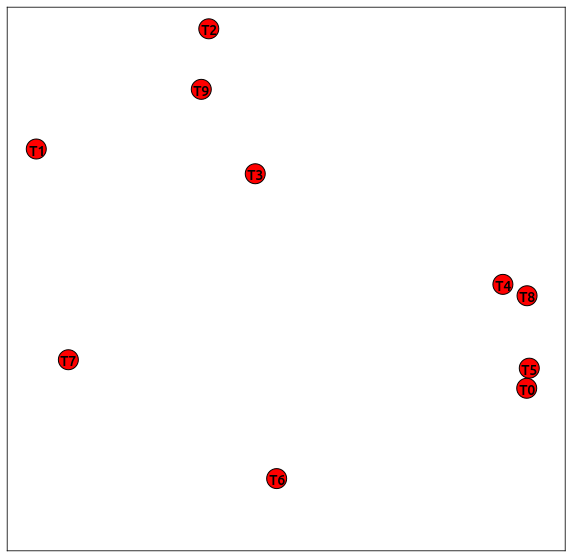

In [3]:
naive = NaiveAgent(data)
dSatur = DSaturAgent(data)
dummy = DummyAgent(data)

g = dummy.get_graph()
fig, ax = GraphHelper.plot(g)
fig

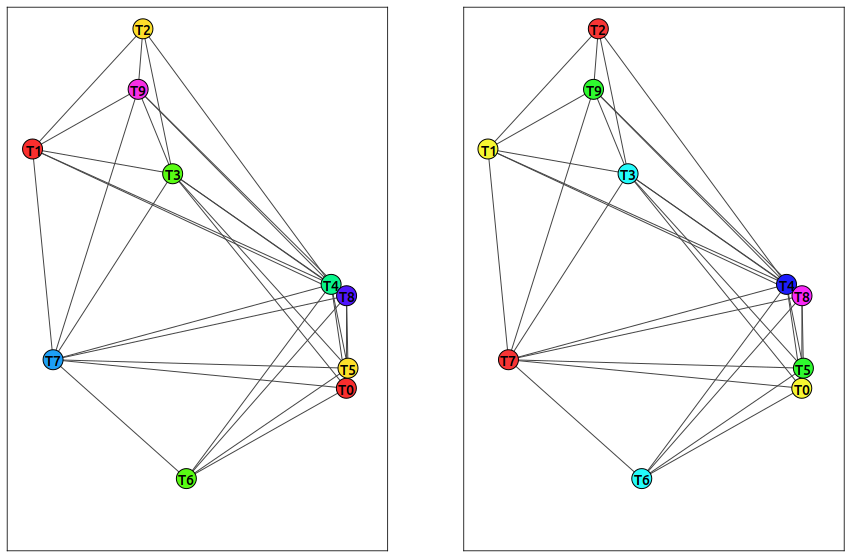

In [4]:
naive.solve()
dSatur.solve()
gn = naive.get_graph()
gd = dSatur.get_graph()

figsize=(15,10)
fig, axs = plt.subplots(1, 2, figsize=figsize)
GraphHelper.plot(gn, figsize, fig=fig, ax=axs[0])
GraphHelper.plot(gd, figsize, fig=fig, ax=axs[1])
fig

In [5]:
print("Frequencies in naive agent: {}\nFrequencies in dsatur agent: {}".format(
        naive.get_frequencies(), dSatur.get_frequencies()))

Frequencies in naive agent: 7
Frequencies in dsatur agent: 6


# Check Spectrum Analyzer

In [6]:
from spectrum_analyzer import SpectrumAnalyzer
from igraph import plot

sys = System(antennas=100)
data1 = sys.get_antennas()

sys = System(antennas=100)
data2 = sys.get_antennas()

sys = System(antennas=100)
data3 = sys.get_antennas()

dummy = DummyAgent(data1)
naive = NaiveAgent(data2)
dsatur = DSaturAgent(data3)
dummy.solve()
naive.solve()
dsatur.solve()

g1 = dummy.get_graph()
g2 = naive.get_graph()
g3 = dsatur.get_graph()

spec1 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))
spec2 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))
spec3 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 
Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 
Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 


In [7]:
for i in range(100):
    spec1.record_signals(data1)
    spec2.record_signals(data2)
    spec3.record_signals(data3)
    g1.add_vertex(x=spec1.position['x'], y=spec1.position['y'], color='grey', label="{}".format(i))
    g2.add_vertex(x=spec2.position['x'], y=spec2.position['y'], color='grey', label="{}".format(i))
    g3.add_vertex(x=spec3.position['x'], y=spec3.position['y'], color='grey', label="{}".format(i))
    spec1.move()
    spec2.move()
    spec3.move()

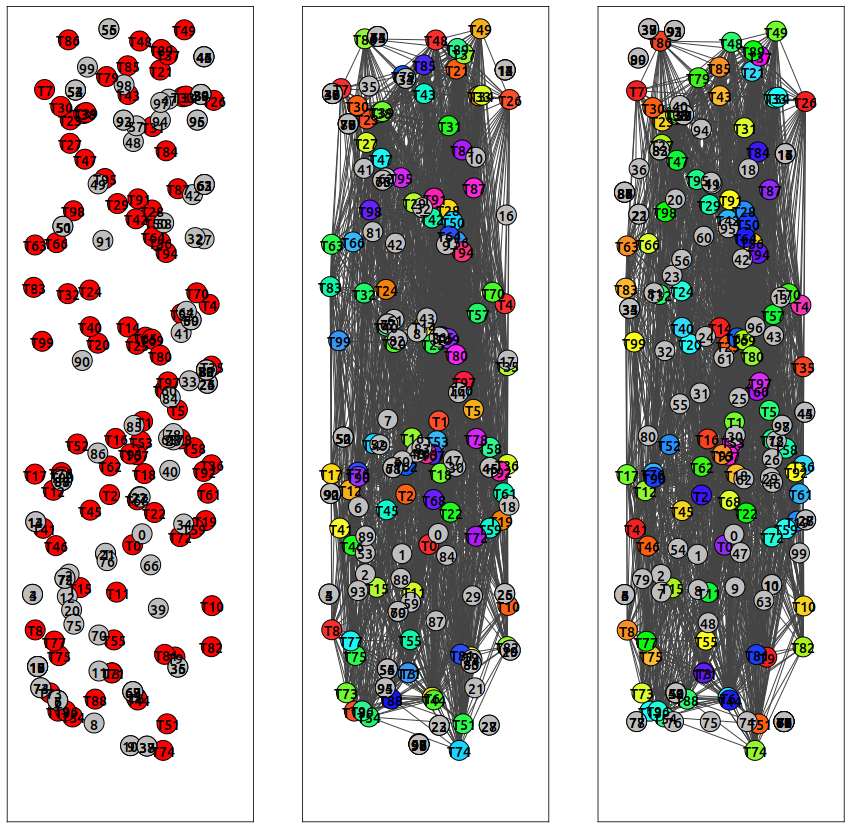

In [8]:
figsize=(15,15)
fig, axs = plt.subplots(1, 3, figsize=figsize)
GraphHelper.plot(g1, figsize, fig=fig, ax=axs[0])
GraphHelper.plot(g2, figsize, fig=fig, ax=axs[1])
GraphHelper.plot(g3, figsize, fig=fig, ax=axs[2])
fig

In [9]:
print("Frequencies in dummy agent: {}\nFrequencies in naive agent: {}\nFrequencies in dsatur agent: {}".format(
        dummy.get_frequencies(), naive.get_frequencies(), dsatur.get_frequencies()))

Frequencies in dummy agent: 1
Frequencies in naive agent: 36
Frequencies in dsatur agent: 33


In [10]:
print("Overlapping in dummy agent: {}\nOverlapping in naive agent: {}\nOverlapping in dsatur agent: {}".format(
        spec1.get_overlapping(), spec2.get_overlapping(), spec3.get_overlapping()))

Overlapping in dummy agent: 1549
Overlapping in naive agent: 0
Overlapping in dsatur agent: 0


# Log Distance Propagation Loss Model

In [11]:
from util.propagation_model import PropagationModel

In [12]:
data = [[GraphHelper.calc_distance({'x': 0, 'y': 0}, {'x': x, 'y': y}), PropagationModel.log(GraphHelper.calc_distance({'x': 0, 'y': 0}, {'x': x, 'y': y}), 50, 11e8, reference_distance=0.2)] for x in np.linspace(0, 1, 10) for y in np.linspace(0, 1, 10) ]

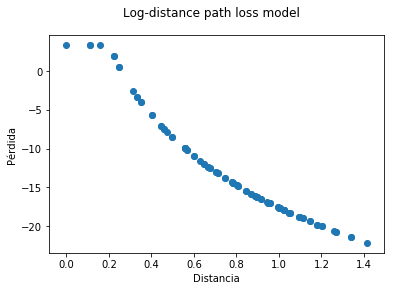

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
s = np.array(data)
plt.scatter(s[:,0], s[:,1])
plt.suptitle("Log-distance path loss model")
plt.xlabel("Distancia")
plt.ylabel("Pérdida")
plt.show()

# Check simulator performance

Direction {'deg': 172, 'rad': 3.0019663134302466}, position: {'x': 0, 'y': 0} 
Direction {'deg': 39, 'rad': 0.6806784082777885}, position: {'x': 0, 'y': 0} 
{'x': 0, 'y': 0}
{0: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]} 0
{'x': 0.007771459614569708, 'y': 0.006293203910498374}
{0: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]} 0
{'x': 0.015542919229139416, 'y': 0.012586407820996749}
{0: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]} 0
{'x': 0.023314378843709124, 'y': 0.018879611731495122}
{0: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0,

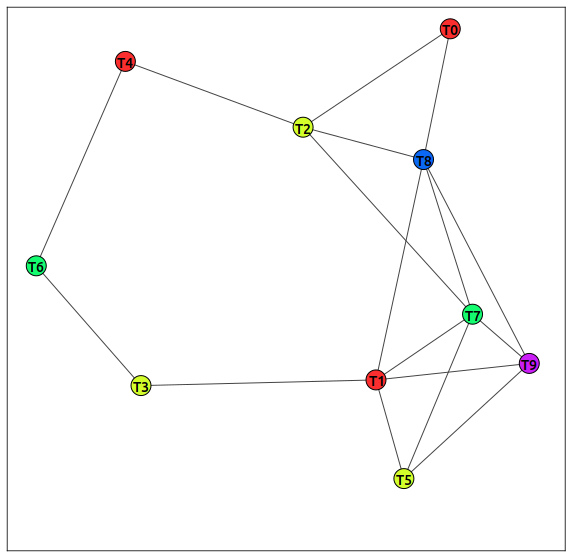

In [14]:
env = Environment.create('naive', limit_time=10, seed=10)
env.start()
fig, ax = GraphHelper.plot(env.get_agent().get_graph())